## **Оглавление:**
- [Шаг 1. Откроем файл с данными и изучим общую информацию](#id-section1)<div id='id-section28'/>
- [Вывод](#id-section2)<div id='id-section29'/>


- [Шаг 2. Подготовим данные к анализу](#id-section3)<div id='id-section30'/>
- [Создадим новый столбец для обозначения сетевых заведений](#id-section4)<div id='id-section31'/>
- [Обработаем дубликаты](#id-section5)<div id='id-section32'/>
- [Вывод](#id-section6)<div id='id-section33'/>


- [Шаг 3. Проанализируем данные](#id-section7)<div id='id-section34'/>
- [Исследуем соотношение видов объектов общественного питания по количеству](#id-section8)<div id='id-section35'/>
- [Вывод](#id-section9)<div id='id-section36'/>
- [Исследуем соотношение сетевых и несетевых заведений по количеству](#id-section10)<div id='id-section37'/>
- [Вывод](#id-section11)<div id='id-section38'/>
- [Узнаем, для какого вида объекта общественного питания характерно сетевое распространение](#id-section12)<div id='id-section39'/>
- [Вывод](#id-section13)<div id='id-section40'/>
- [Исследуем распределение числа посадочных мест для сетевых заведений](#id-section14)<div id='id-section41'/>
- [Вывод](#id-section15)<div id='id-section42'/>
- [Узнаем среднее количество посадочных мест для каждого вида объекта общественного питания](#id-section16)<div id='id-section43'/>
- [Вывод](#id-section17)<div id='id-section44'/>
- [Выделим в отдельный столбец информацию об улице](#id-section18)<div id='id-section45'/>
- [Вывод](#id-section19)<div id='id-section46'/>
- [Построим график топ-10 улиц по количеству объектов общественного питания](#id-section20)<div id='id-section47'/>
- [Вывод](#id-section21)<div id='id-section48'/>
- [Найдем число улиц с одним объектом общественного питания](#id-section22)<div id='id-section49'/>
- [Вывод](#id-section23)<div id='id-section50'/>
- [Исследуем распределение числа посадочных мест для улиц с большим количеством объектов общественного питания](#id-section24)<div id='id-section51'/>
- [Вывод](#id-section25)<div id='id-section52'/>


- [Шаг 4. Общий вывод](#id-section26)<div id='id-section53'/>


- [Шаг 5. Презентация](#id-section27)<div id='id-section54'/>

<div id='id-section1'/>

## [Шаг 1. Откроем файл с данными и изучим общую информацию](#id-section28)


Импортируем необходимые библиотеки.

Применим метод `sample(10)`, чтобы вывести на экран 10 случайных строк из таблицы.

Также сразу посмотрим, какие типы данных хранятся в таблице, воспользуемся методом `info()`.

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# !pip install pymystem3
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
from bs4 import BeautifulSoup
import requests
import json

df = pd.read_csv('/datasets/rest_data.csv')

display(df.sample(10))
df.info()

,id,object_name,chain,object_type,address,number
889,70329,Кулинар №1,нет,ресторан,"город Москва, Петровско-Разумовский проезд, до...",80
7803,24084,Цех бортового питания,нет,столовая,"город Москва, деревня Толстопальцево, Советска...",1
11410,185638,Doner Kebab-Куры Гриль,нет,закусочная,"город Москва, Хорошёвское шоссе, дом 1Б, строе...",0
11701,186513,Ресторан «ABC Kitchen»,нет,ресторан,"город Москва, Пресненская набережная, дом 6, с...",20
15098,213642,Бургер Кинг,да,закусочная,"город Москва, Поречная улица, дом 10",0
11588,175901,CINNABON,нет,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
4175,69665,Гурия,нет,ресторан,"город Москва, Таганская площадь, дом 12, строе...",98
14204,207883,Пунк питания,нет,кафе,"город Москва, Большая Черкизовская улица, дом 125",0
142,26142,KFC,да,ресторан,"город Москва, Бутырская улица, дом 89",67
136,25608,Шоколадница,да,кафе,"город Москва, Бутырская улица, дом 7",25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


<div id='id-section2'/>

### [Вывод](#id-section29)

Таблица `df` - массив данных, в котором хранится 15 366 строк. Пропущенных значений в таблице нет. 

- Категориальные переменные `object_name`, `object_type`, `address` с типом данных `object` и `id` с типом данных `int64` - это корректно. Количественная переменная `number` с типом данных `int64` - корретно.

- Логическая переменная `chain` имеет тип данных `object`, так как в ней используются обозначения на русском языке ("`нет` / `да`"). Если мы заменим их на `0` и `1` (или `False` и `True`), то тип данных в переменной станет `bool`. Мы считаем, что менять исходную переменную не стоит, так как обозначения "`нет` / `да`" могут понадобиться нам для графиков, и лучше создать новый столбец с `0` и `1`. 

<div id='id-section3'/>

## [Шаг 2. Подготовим данные к анализу](#id-section30)

<div id='id-section4'/>

### [Создадим новый столбец для обозначения сетевых заведений](#id-section31)

Сформируем словарь, в котором обозначим `нет` как `0`, а `да` как `1`. Применим этот словарь к столбцу `chain` методом `map()` и сохраним результат в новом столбце `chain_bool`. + Выполним проверку, что замена произошла корректно. 

In [2]:
chain_map = {'нет': 0, 'да': 1}
df['chain_bool'] = df['chain'].map(chain_map)

#проверяем
display(df['chain'].value_counts(), df['chain_bool'].value_counts())

нет    12398
да      2968
Name: chain, dtype: int64

0    12398
1     2968
Name: chain_bool, dtype: int64

<div id='id-section5'/>

### [Обработаем дубликаты](#id-section32)

Поищем **полные** дубликаты в таблице методом `duplicated().sum()`, что позволит нам посчитать общее количество дубликатов. 

In [3]:
display(df.duplicated().sum())

0

In [4]:
# убираем столбец id
df_without_id = df.drop(columns = 'id')

# смотрим, в каких строках дубликаты находятся (= True), если убрать id
series_with_duplicates = df_without_id.duplicated()

# меняем для дубликатов условие True на False. Теперь True только там, где дубликатов нет
series_without_duplicates = series_with_duplicates.apply(lambda x: not x)

# оставляем в исходном датасете только те строки, которые попали под условие True 
# (накладываем series_without_duplicates без дубликатов)
df = df.loc[series_without_duplicates]

<div id='id-section6'/>

### [Вывод](#id-section33)

На данном этапе мы:
- сформировали новый столбец `chain_bool` для обозначения сетевых заведений, где значению `нет` соотвествует `0`, а значению `да` - `1`,
- проверили, что полные дубликаты в таблице не обнаружены,
- убрали из таблицы неполные дубликаты.

<div id='id-section7'/>

## [Шаг 3. Проанализируем данные](#id-section34)

<div id='id-section8'/>

### [Исследуем соотношение видов объектов общественного питания по количеству](#id-section35)

Нарисуем график методом `countplot()` из библиотеки `Seaborn`. Для удобства отобразим данные горизонтально, указав значения по оси `У`, и отсортируем их. 

Автоматизируем построение графика при помощи функции.

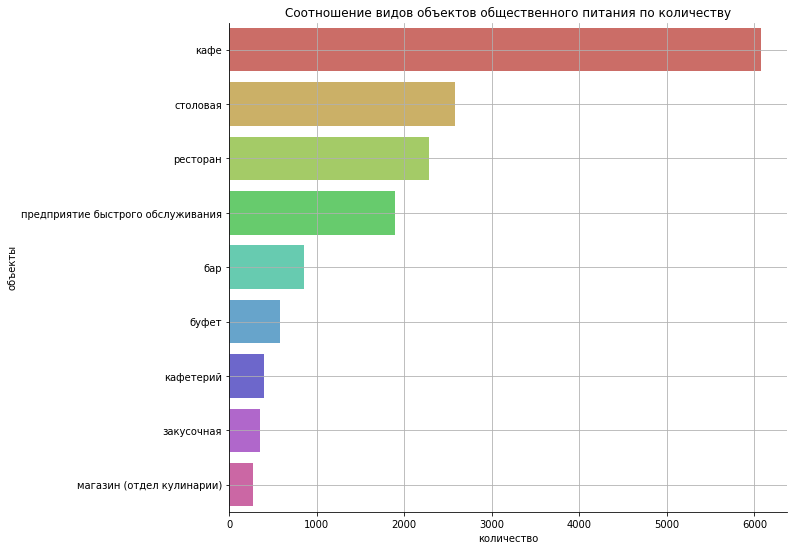

In [5]:
parameters = {
     'figsize': (10, 9),
     'column': 'object_type',
     'data': df,
     'xlabel': 'количество',
     'ylabel': 'объекты',
     'title': 'Соотношение видов объектов общественного питания по количеству'
}

def countplot(parameters):
    plt.figure(figsize = parameters.get('figsize'))
    ax = sns.countplot(y = parameters.get('column'), data = parameters.get('data'), order = \
                       parameters.get('data')[parameters.get('column')]\
                       .value_counts().index, palette = "hls")
    ax.set_xlabel(parameters.get('xlabel'))
    ax.set_ylabel(parameters.get('ylabel'))
    ax.set_title(parameters.get('title'))
    ax.grid()
    sns.despine()

countplot(parameters)    

<div id='id-section9'/>

### [Вывод](#id-section36)

Среди всех видов объектов общественного питания **лидирующие позиции** занимает **кафе**, на втором месте - **столовая**, на третьем - **ресторан**.

- Вероятно, это объясняется тем, что **рестораны** предоставляют своим посетителям широкий ассортимент «сложных» блюд, то есть прошедших весь технологический цикл приготовления, с очень высоким уровнем обслуживания. 

- **Столовые** чаще всего открываются государственных учреждениях, поэтому они, в отличие от всех остальных предприятий, всегда обеспечены посетителями и им не нужно предпринимать усилия для привлечения новых клиентов через открытие новых точек. 

- А вот **кафе** отличаются от ресторанов меньшим ассортиментом блюд и менее жесткими требованиями к способам их приготовления, поэтому открытие кафе кажется нам более простым мероприятием, чем открытие ресторана.

Самыми **редко встречающимися** объектами общественного питания являются: **отделы кулинарии в магазинах, закусочные, кафетерии**.

- Возможно, это связано с тем, что данные предприятия предлагают очень ограниченное количество блюд, поэтому они не так распространены и популярны.

<div id='id-section10'/>

### [Исследуем соотношение сетевых и несетевых заведений по количеству](#id-section37)

Пропишем новые параметры для графика (он будет строиться по столбцу `chain`, в котором указано, сетевое ли заведение) и вызовем написанную ранее функцию `countplot`. 

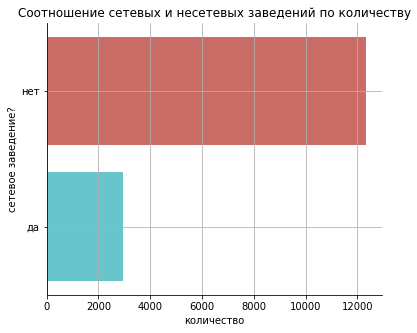

In [6]:
parameters = {
     'figsize': (6, 5),
     'column': 'chain',
     'data': df,
     'xlabel': 'количество',
     'ylabel': 'сетевое заведение?',
     'title': 'Соотношение сетевых и несетевых заведений по количеству'
}

countplot(parameters) 

<div id='id-section11'/>

### [Вывод](#id-section38)

**Несетевых заведений** значительно больше. 

- Возможно, с юридической и экономической точек зрения открывать большинство видов заведений проще самостоятельно, чем через франшизы, поэтому и несетевых заведений больше, чем сетевых.

<div id='id-section12'/>

### [Узнаем, для какого вида объекта общественного питания характерно сетевое распространение](#id-section39)

Сформируем таблицу методом `groupby()`, где для каждого вида объекта общественного питания найдем долю сетевых заведений - применим ко столбцу `chain_bool` функцию `mean()`. Отсортируем значения по убыванию.

Выведем результат на график методом `barplot()`. Построение графика автоматизируем.

,object_type,chain_share
6,предприятие быстрого обслуживания,0.415174
5,магазин (отдел кулинарии),0.285714
7,ресторан,0.237949
3,кафе,0.229946
2,закусочная,0.160458
4,кафетерий,0.131646
0,бар,0.043275
1,буфет,0.019064
8,столовая,0.001161


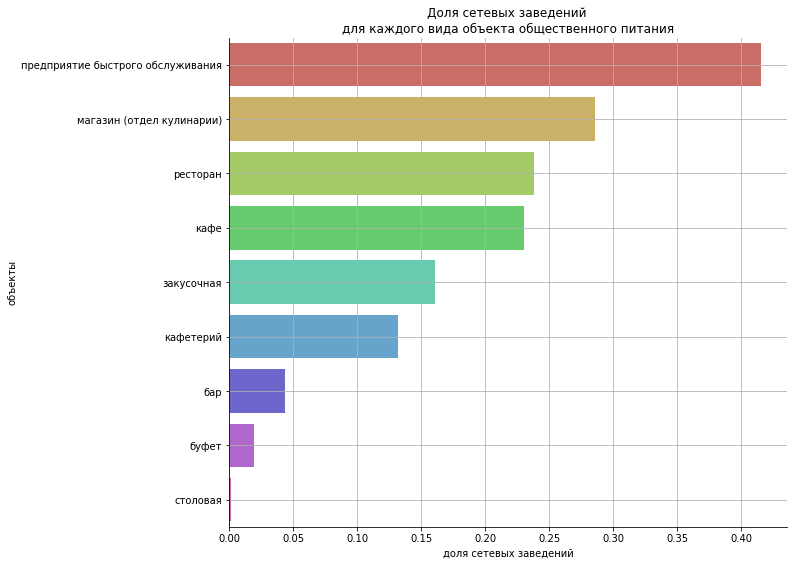

In [7]:
chain_share = df.groupby('object_type', as_index = False)['chain_bool'].mean()\
.sort_values(by = 'chain_bool', ascending = False)
chain_share.columns = ['object_type', 'chain_share']
display(chain_share)

parameters = {
    'figsize': (10, 9),
    'x': 'chain_share',
    'y': 'object_type',
    'data': chain_share,
    'xlabel': 'доля сетевых заведений',
    'ylabel': 'объекты',
    'title': 'Доля сетевых заведений \nдля каждого вида объекта общественного питания'
}

def barplot(parameters):
    plt.figure(figsize = parameters.get('figsize'))
    ax = sns.barplot(x = parameters.get('x'), y = parameters.get('y'), data = parameters.get('data'), \
                     palette = "hls")
    ax.set_xlabel(parameters.get('xlabel'))
    ax.set_ylabel(parameters.get('ylabel'))
    ax.set_title(parameters.get('title'))
    ax.grid()
    sns.despine()

barplot(parameters)

<div id='id-section13'/>

### [Вывод](#id-section40)

Сетевое распространение в большей степени характерно для **предприятий быстрого обслуживания (фаст-фуда)**. 

- Вероятно, открытие таких заведений в рамках сети дает преимущества в виде узнаваемости (клиентам уже знакома сеть, поэтому они идут в новые заведения, уже зная, какой выбор блюд там существует и каково качество приготовления), также при открытии каждого нового заведения можно сэкономить на проработке дизайна и концепции (не надо изобретать ничего нового, концепция реализуется по стандартному шаблону). 

<div id='id-section14'/>

### [Исследуем распределение числа посадочных мест для сетевых заведений](#id-section41)

Узнаем, какое количество посадочных мест характерно для сетевых заведений. 

Для этого сформируем срез данных (только сетевые заведения) методом `query()` и нарисуем гистограмму для столбца с числом посадочных мест методом `distplot()`.

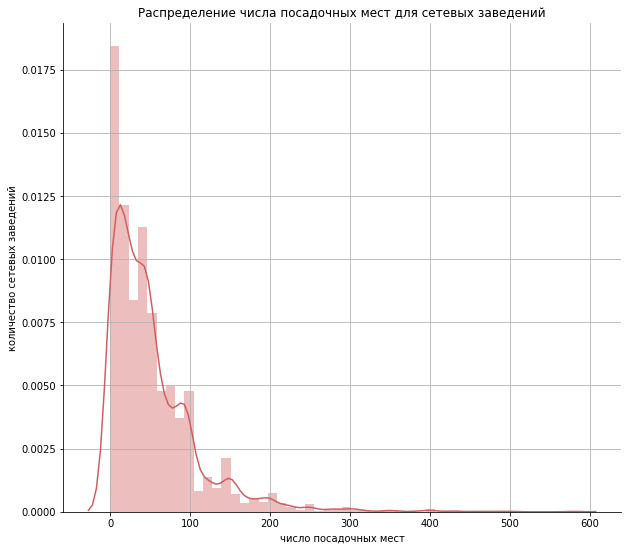

In [8]:
plt.figure(figsize = (10, 9))
ax = sns.distplot(df.query('chain == "да"')['number'], bins = 50, color = '#D05E5E')
ax.set_xlabel('число посадочных мест')
ax.set_ylabel('количество сетевых заведений')
ax.set_title('Распределение числа посадочных мест для сетевых заведений')
ax.grid()
sns.despine()

<div id='id-section15'/>

### [Вывод](#id-section42)

- Гистограмма явно скошена влево. Это означает, что у сетевых заведений, согласно имеющимся данным, больше всего заведений с **небольшим количеством посадочных мест (до 50)**.

- Сетевых заведений, у которых посадочных мест от 100 и более, совсем немного, и их число снижается в зависимости от увеличения количества посадочных мест. 

- При этом в данных встречаются и очень крупные значения (400-500-600 посадочных мест) - либо это огромные банкетные залы (возможно, какие-то имиджевые проекты от сетевых заведений), либо аномальные значения (выбросы).

<div id='id-section16'/>

### [Узнаем среднее количество посадочных мест для каждого вида объекта общественного питания](#id-section43)

Сформируем таблицу методом `groupby()`, где для каждого вида объекта общественного питания найдем среднее количество посадочных мест  - применим ко столбцу `number` функцию `mean()`. Отсортируем значения по убыванию.

Выведем результат на график при помощи написанной ранее функции.

,object_type,seat_number_mean
8,столовая,130.337848
7,ресторан,96.884750
1,буфет,51.509532
0,бар,43.533333
3,кафе,39.785703
6,предприятие быстрого обслуживания,20.808219
4,кафетерий,9.184810
2,закусочная,7.825215
5,магазин (отдел кулинарии),5.589744


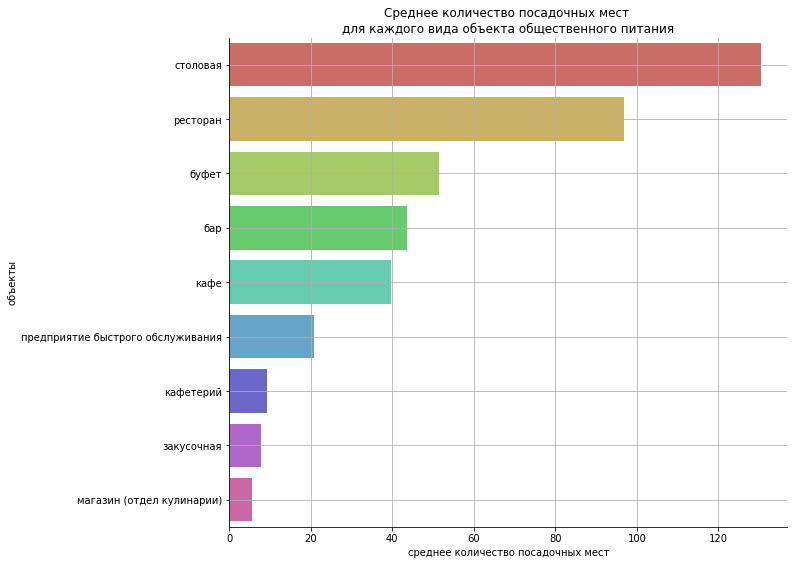

In [9]:
seat_number = df.groupby('object_type', as_index = False)['number'].mean()\
.sort_values(by = 'number', ascending = False)
seat_number.columns = ['object_type', 'seat_number_mean']
display(seat_number)

parameters = {
    'figsize': (10, 9),
    'x': 'seat_number_mean',
    'y': 'object_type',
    'data': seat_number,
    'xlabel': 'среднее количество посадочных мест',
    'ylabel': 'объекты',
    'title': 'Cреднее количество посадочных мест \nдля каждого вида объекта общественного питания'
}

barplot(parameters)

<div id='id-section17'/>

### [Вывод](#id-section44)

**Столовые** предоставляют в среднем самое большое количество посадочных мест (130). 
- Это может быть связано с тем, что столовые чаще всего открываются государственных учреждениях, и они изначально должны быть спроектированы таким образом, чтобы предоставить места всем посетителям данных учреждений (учащимся / сотрудникам).

На втором месте по количеству посадочных мест - **рестораны**. 
- Вероятно, многие рестораны имеют банкетные залы с большой вместимостью, что позволило им занять достаточно высокую позицию в рейтинге. 

На нижних позициях по количеству посадочных мест: **отделы кулинарии в магазинах, закусочные, кафетерии**.
- Эти объекты располагаются в небольших помещениях, они предлагают ограниченное количество блюд для перекуса, поэтому посадочные места там и вовсе могут быть не предусмотрены (либо их несколько). 

<div id='id-section18'/>

### [Выделим в отдельный столбец информацию об улице](#id-section45)

Сначала разобьем каждую строку с адресом на отдельные элементы методом `str.split()`, критерием для разбиения укажем запятые и последующие пробелы. Результат сохраним в новом столбце `split_address`. 

In [10]:
df['split_address'] = df['address'].str.split(', ')

display(df.head())

,id,object_name,chain,object_type,address,number,chain_bool,split_address
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,0,"[город Москва, улица Егора Абакумова, дом 9]"
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,0,"[город Москва, улица Талалихина, дом 2/1, корп..."
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,0,"[город Москва, Абельмановская улица, дом 6]"
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,1,"[город Москва, Абрамцевская улица, дом 1]"
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,0,"[город Москва, Абрамцевская улица, дом 9, корп..."


Выделим **леммы** в значениях исходного столбца с адресом (`address`). 

Сначала сохраним все уникальные значения столбца с адресом в одну огромную строку методом `join()`, а потом пролемматизируем эту строку методом `lemmatize()`. 

Методом `Counter()` посчитаем, сколько нашлось каждой леммы, - в дальнейшем это поможет нам определить, какой кусочек из списка `split_address` будет сохранен в отдельном столбце (с улицей, проспектом и т.д.)

In [11]:
#сохраним все уникальные значения столбца с адресом в одну огромную строку
long_string = ' '.join(df['address'].unique())

#пролемматизируем эту строку
lemmas = m.lemmatize(long_string)

#посчитаем, сколько нашлось каждой леммы
count = Counter(lemmas)

Так как массив данных очень большой, словарь с уникальными леммами получается огромный. 

Чтобы не выводить на экран его целиком, отфильтруем только те леммы, которые встречаются в данных **более 30 раз** (так мы отсечем все то, что встречается редко). 

Сохраним отфильтрованный словарь с леммами в `filtered_count` и выведем эту переменную на экран, чтобы отобрать наиболее часто употребляемые категории для обозначения адреса. 

In [12]:
filtered_count = {k: v for k, v in count.items() if v > 30}

display(filtered_count)

{'город': 9318,
 ' ': 43608,
 'москва': 9054,
 ', ': 23025,
 'улица': 5671,
 'дом': 8746,
 '9': 308,
 '2': 1523,
 '/': 649,
 '1': 2742,
 'корпус': 1883,
 '6': 415,
 '15': 239,
 'переулок': 554,
 '8': 347,
 'строение': 2586,
 '47': 39,
 '51': 31,
 '14': 225,
 '16': 222,
 '18': 157,
 '3': 877,
 '4': 552,
 'большой': 370,
 '5': 505,
 '33': 84,
 '7': 393,
 'алтуфьевский': 44,
 'шоссе': 625,
 '10': 346,
 'проезд': 545,
 '39': 64,
 'проспект': 742,
 '17': 187,
 '26': 126,
 '30': 92,
 '38': 53,
 'арбат': 55,
 '23': 137,
 '25': 118,
 '36': 82,
 '29': 100,
 '31': 82,
 '32': 103,
 '45': 37,
 '24': 135,
 '-': 828,
 '48': 32,
 'й': 263,
 'новый': 35,
 '12': 291,
 '35': 60,
 '19': 154,
 '21': 157,
 '28': 99,
 '13': 239,
 'набережная': 150,
 'бульвар': 384,
 '40': 61,
 '57': 31,
 'маршал': 104,
 '22': 159,
 '11': 272,
 'академик': 89,
 'я': 333,
 '43': 42,
 '27': 101,
 'малый': 112,
 '20': 175,
 'владение': 212,
 '44': 44,
 'варшавский': 91,
 'вернадский': 55,
 '37': 47,
 'верхний': 46,
 '52': 37,
 

Из словаря с леммами `filtered_count` мы отобрали такие **категории** для обозначения улицы:
- улица,
- переулок,
- шоссе,
- проезд,
- проспект,
- набережная,
- бульвар,
- площадь,
- аллея.

Запишем эти категории в список `street_names`.

Напишем функцию `func()`, которая будет перебирать элементы в некоем списке `list`, а также названия в сформированном списке категорий `street_names`. 
- В случае, если категория `name` содержится в элементе списка `list` (неважно, строчными или заглавными буквами категория будет написана), этот элемент возвращается. 
- В случае, если никакая из категорий `name` не содержится в элементе списка `list`, возвращается пустое значение.

Методом `apply()` применим функцию ко столбцу `split_address` (в нем каждая строка с адресом представлена как список, разбитый на отдельные элементы) - таким образом создадим новый столбец `street` с улицей.

In [13]:
#создаем список категорий
street_names = ['улица', 'переулок', 'шоссе', 'проезд', 'проспект', 'набережная', 'бульвар', 'площадь', 'аллея']

#создаем функцию для перебора элементов в списке list, а также названий в списке 
# категорий street_names
def func(list):
    for element in list:
        for name in street_names:
            if re.search(name, element, re.IGNORECASE):
                return element
    return ""  

#создаем новый столбец с применением функции
df['street'] = df['split_address'].apply(func)

display(df)

,id,object_name,chain,object_type,address,number,chain_bool,split_address,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,0,"[город Москва, улица Егора Абакумова, дом 9]",улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,0,"[город Москва, улица Талалихина, дом 2/1, корп...",улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,0,"[город Москва, Абельмановская улица, дом 6]",Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,1,"[город Москва, Абрамцевская улица, дом 1]",Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,0,"[город Москва, Абрамцевская улица, дом 9, корп...",Абрамцевская улица
...,...,...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,1,"[город Москва, 3-й Крутицкий переулок, дом 18]",3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,1,"[город Москва, улица Земляной Вал, дом 33]",улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,1,"[город Москва, улица Земляной Вал, дом 33]",улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,1,"[город Москва, поселение Московский, Киевское ...",Киевское шоссе


Проверим, какую долю составляют строки, для которых наша функция не смогла вычленить название улицы. 

Разделим число таких строк на общее число строк в базе данных, применим метод `shape`.

In [14]:
display(df.query('street == ""').shape[0] / df.shape[0])

0.027218005757655064

<div id='id-section19'/>

### [Вывод](#id-section46)

На данном этапе мы:
- сформировали новый столбец `street`, в котором указано только название улицы (проезда, проспекта и т.д. - в зависимости от категории),
- убедились, что пустые строки в столбце `street` (из-за того, что мы не смогли вычленить название) составляют лишь **2%** от общего числа строк в таблице - это очень маленькое значение. Значит, функция смогла обработать большинство адресов. 

<div id='id-section20'/>

### [Построим график топ-10 улиц по количеству объектов общественного питания](#id-section47)

Методом `query()` отсечем от данных 2% строк, для которых не удалось вычленить название улицы. 

Для остальных строк методом `groupby()` для каждой улицы найдем количество ресторанов (`id`) на ней. Отсортируем значения по количеству ресторанов и получим рейтинг для всех улиц.

In [15]:
street_range = df.query('street != ""').groupby('street', as_index = False)['id'].count()\
.sort_values(by = 'id', ascending = False)
street_range.columns = ['street', 'rest_count']

display(street_range)

,street,rest_count
1407,проспект Мира,204
1003,Профсоюзная улица,182
676,Ленинградский проспект,172
986,Пресненская набережная,167
390,Варшавское шоссе,165
...,...,...
1331,Якиманский переулок,1
1333,Ялтинская улица,1
1334,Янтарный проезд,1
524,Заводской проезд,1


Сформируем топ-10 улиц по количеству ресторанов - оставим 10 первых значений из рейтинга `street_range`. 

Результат выведем на график, используя ранее написанную функцию `barplot()` с параметрами. 

,street,rest_count
1407,проспект Мира,204
1003,Профсоюзная улица,182
676,Ленинградский проспект,172
986,Пресненская набережная,167
390,Варшавское шоссе,165
679,Ленинский проспект,148
1403,проспект Вернадского,128
666,Кутузовский проспект,114
590,Каширское шоссе,111
597,Кировоградская улица,108


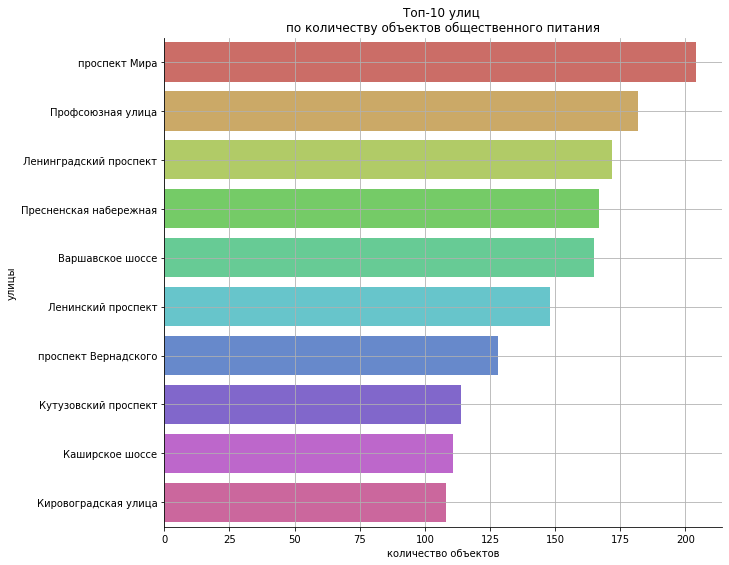

In [16]:
top_10_street = street_range.head(10)

display(top_10_street)

parameters = {
    'figsize': (10, 9),
    'x': 'rest_count',
    'y': 'street',
    'data': top_10_street,
    'xlabel': 'количество объектов',
    'ylabel': 'улицы',
    'title': 'Топ-10 улиц \nпо количеству объектов общественного питания'
}

barplot(parameters)

**Каждая из этих улиц может проходить через несколько районов Москвы.** 

Чтобы понять, в каких именно районах для топ-10 улиц ресторанов больше всего, нам надо получить конкретные адреса, по которым расположено большинство заведений (достаточно получить топ-3 адреса по количеству заведений).

Для этого по каждой улице из топ-10 надо сделать срез данных из таблицы, а затем для каждого адреса, который попадает в срез, посчитать количество ресторанов. Число таких адресов будет ограничено до 3-х самых часто встречающихся (`head(3)`).

Для автоматического построения 10 срезов создадим список с улицами-категориями (из топ-10) `top_10_street_list`, а затем циклом переберем каждую категорию из списка и получим по 3 адреса, по которым расположено больше всего заведений.

Затем эти адреса объединим в список `top_10_street_addresses_list`. 

In [17]:
# сформируем список из топ-10 улиц
top_10_street_list = top_10_street['street'].to_list()


# напишем цикл для перебора элементов из списка top_10_street_list и создания срезов данных. 
# Все полученные адреса сохранятся в отдельный список top_10_street_addresses_list

top_10_street_addresses_list = []

for element in top_10_street_list:
    top_10_street_addresses_list.extend(df.query('street == @element')\
                                        .groupby('address', as_index = False)['id'].count()\
                                        .sort_values(by = 'id', ascending = False).head(3)\
                                        ['address'].to_list())
display(top_10_street_addresses_list)

['город Москва, проспект Мира, дом 211, корпус 2',
 'город Москва, проспект Мира, дом 150',
 'город Москва, проспект Мира, дом 26, строение 1',
 'город Москва, Профсоюзная улица, дом 61А',
 'город Москва, Профсоюзная улица, дом 56',
 'город Москва, Профсоюзная улица, дом 129А',
 'город Москва, Ленинградский проспект, дом 36',
 'город Москва, Ленинградский проспект, дом 31А, строение 1',
 'город Москва, Ленинградский проспект, дом 62А',
 'город Москва, Пресненская набережная, дом 2',
 'город Москва, Пресненская набережная, дом 12',
 'город Москва, Пресненская набережная, дом 10',
 'город Москва, Варшавское шоссе, дом 87Б',
 'город Москва, Варшавское шоссе, дом 1',
 'город Москва, Варшавское шоссе, дом 160',
 'город Москва, Ленинский проспект, дом 109',
 'город Москва, Ленинский проспект, дом 158',
 'город Москва, Ленинский проспект, дом 146',
 'город Москва, проспект Вернадского, дом 6',
 'город Москва, проспект Вернадского, дом 86А',
 'город Москва, проспект Вернадского, дом 29',
 'гор

In [18]:
# # Эта функция создает словарь [улица -> ссылка на нее],
# # обходя все страницы с улицами сайта mosopen.
# # Она работает иногда очень долго, поэтому мы запустили ее 1 раз на PyCharm, 
# # а потом сохранили ее результат в промежуточный файл в формате json на гугл-диске, 
# # и уже для дальнейшего анализа использовали только его

# def getAllStreet():
#     letters = [1, 2, 3, 4, 5, 6, 7, 9, 10,
#            11, 13, 14, 15, 16, 17, 18,
#            19, 20, 21, 22, 23, 24, 25, 26,
#            27, 28, 30, 31, 32]
#     dict = {}
#     for letter in letters:
#         streets = requests.get(url="http://mosopen.ru/streets/letter/" + str(letter))
#         soup = BeautifulSoup(streets.text, 'lxml')
#         parts = soup.find_all('div', attrs={'class': 'double_part'})
#         for part in parts:
#             links = part.find_all('a')
#             for l in links:
#                 dict[l.text.replace(',', '')] = l.attrs['href']
#         print(letter)
#     return dict

google = requests.get('https://docs.google.com/uc?export=download&id=1HHXiihkymPgWUTYqUpYEGKXxSzfXauBF')
streets_mosopen = json.loads(google.text)


# аналогично построению функции func (которая была написана ранее, когда мы вычленяли улицу 
# по адресу), мы пишем функцию для определения номера дома.
# Нам нужны только главные цифры, то есть из строки "дом 4с5к7" мы вычленим "4", 
# так как считаем, что эти дома находятся в 1 районе

# судя по адресам из top_10_street_addresses_list, есть такие категории для обозначения дома:
house_names = ['дом', 'владение']

def extractHouseNumber(list):
    for element in list:
        for name in house_names:
            match = re.search(name + ' ([0-9]+).*', element, re.IGNORECASE)
            if match != None:
                return match.group(1)
    return ""



# ищем дома в словаре [дом -> ссылка на страницу дома], если прямого совпадения нет,
# пробуем найти дом с ближайшим номером (в диапазоне от 1 до 10), так как считаем, что такие 
# дома находятся в одном районе
def findHouse(house, houses_dict):
    if house in houses_dict:
        return houses_dict[house]
    else:
        house_number = int(house)
        for i in range(1, 10):
            if str(house_number + i) in houses_dict:
                return houses_dict[str(house_number + i)]
            if str(house_number - i) in houses_dict:
                return houses_dict[str(house_number - i)]
        return next(iter(houses_dict.values()))


# по странице улицы находим ссылку на страницу дома,
# собираем все дома в словарик [номер дома -> ссылка на его странцу]
# и используем функцию findHouse что бы найти наиболее подходящий элемент
def getHouseLink(link, house_number):
    result = requests.get(url = link)
    soup = BeautifulSoup(result.text, 'lxml')

    result = None
    for e in soup.find_all('p'):
        if re.search('Список домов и строений:.*', e.text) != None:
            result = e
    dict = {}
    if result == None:
        return ""
    a_blocks = result.find_all('a')
    if a_blocks == None:
        return ""
    for a in a_blocks:
        match = re.search('([0-9]+)[^0-9]*.*', a.text)
        if match != None:
            upd = match.group(1)
            dict[upd] = a.attrs['href']

    return findHouse(house_number, dict)



# достаем название района из страницы дома.
# мы знаем, что оно лежит внутри одного из тегов <dl class='clearfix' --
# поэтому мы ищем все такие теги, а из них выбираем тот, где в тексте есть слово "Район"
def getDisctrictFromHouseLink(house_link):
    result = requests.get(house_link).text
    soup = BeautifulSoup(result, 'lxml')
    district = None
    for e in soup.find_all('dl', attrs={'class': 'clearfix'}):
        if re.search('Район.*', e.text) != None:
            district = e
    if district != None:
        return district.find('a').text
    else:
        return ""

# ищем улицу в словаре улиц, если есть прямое совпадение, то возвращаем его.
# Бывает, что совпадения нет, например, в одном случае улица называется "проспект Мира", 
# а в другом "Мира проспект".
# В таком случае мы пробуем найти одно главное слово в названии улицы (первое с большой буквы),
# и перебираем весь словарь, чтобы найти название, в котором наше главное слово присутствует
def findStreet(street, street_dict):
    if street in street_dict:
        return street_dict[street]
    else:
        words = street.split(' ')
        main_words = []
        for word in words:
            if word[0].isupper():
                main_words.append(word)
        if len(main_words) > 1 or len(main_words) == 0:
            return ""
        else:
            main_word = main_words[0]
            for street_name in street_dict:
                if re.search(main_word, street_name) != None:
                    return street_dict[street_name]
            return ""


# собираем все функции вместе
# 1) по улице находим ссылку на улицу
# 2) по дому находим ссылку на дом
# 3) по ссылке на дом достаем район
def findDistrictByAddress(street_dict, address):
    steet_link = findStreet(address[0], street_dict)
    if steet_link == "":
        return "can not find street"
    house_link = getHouseLink(steet_link, address[1])
    if house_link == "":
        return "can not find house"
    return getDisctrictFromHouseLink(house_link)

In [19]:
# применяем функцию для каждого элемента (= по топ-3 адреса с каждой из топ-10 улиц) из списка 
# top_10_street_addresses_list 

for address in top_10_street_addresses_list:
    split = address.split(", ")
    street = func(split)
    house = extractHouseNumber(split)
    district = findDistrictByAddress(streets_mosopen, [street, house])
    print(address + ": район " + district)

город Москва, проспект Мира, дом 211, корпус 2: район Свиблово
город Москва, проспект Мира, дом 150: район Алексеевский
город Москва, проспект Мира, дом 26, строение 1: район Мещанский
город Москва, Профсоюзная улица, дом 61А: район Черёмушки
город Москва, Профсоюзная улица, дом 56: район Обручевский
город Москва, Профсоюзная улица, дом 129А: район Ясенево
город Москва, Ленинградский проспект, дом 36: район Аэропорт
город Москва, Ленинградский проспект, дом 31А, строение 1: район Беговой
город Москва, Ленинградский проспект, дом 62А: район Аэропорт
город Москва, Пресненская набережная, дом 2: район Пресненский
город Москва, Пресненская набережная, дом 12: район Пресненский
город Москва, Пресненская набережная, дом 10: район Пресненский
город Москва, Варшавское шоссе, дом 87Б: район Нагорный
город Москва, Варшавское шоссе, дом 1: район Донской
город Москва, Варшавское шоссе, дом 160: район Южное Чертаново
город Москва, Ленинский проспект, дом 109: район Обручевский
город Москва, Ленинск

<div id='id-section21'/>

### [Вывод](#id-section48)

Мы выявили **топ-10 улиц** по количеству объектов общественного питания и выяснили **районы** их расположения:
1. проспект Мира (районы Свиблово, Алексеевский, Мещанский),
2. Профсоюзная улица (районы Черемушки, Обручевский, Ясенево),
3. Ленинградский проспект (районы Аэропорт, Беговой),
4. Пресненская набережная (район Пресненский),
5. Варшавское шоссе (районы Нагорный, Донской, Чертаново Южное),
6. Ленинский проспект (районы Обручевский, Тропарево-Никулино),
7. проспект Вернадского (районы Раменки, Тропарево-Никулино),
8. Кутузовский проспект (районы Фили-Давыдково, Дорогомилово),
9. Каширское шоссе (районы Москворечье-Сабурово, Нагатино-Садовники),
10. Кировоградская улица (районы Чертаново Центральное, Северное).

<div id='id-section22'/>

### [Найдем число улиц с одним объектом общественного питания](#id-section49)

Воспользуемся ранее созданной переменной `street_range`, в которой для каждой улицы найдено количество ресторанов на ней (без учета 2% строк, где не удалось выделить название). 

Выделим срез данных с условием, чтобы количество ресторанов было = 1. Методом `shape` посчитаем количество строк - это и есть количество улиц с одним объектом общественного питания

In [20]:
display('Число улиц с одним объектом общественного питания: ' + \
        str(street_range.query('rest_count == 1').shape[0]))

'Число улиц с одним объектом общественного питания: 538'

In [21]:
# формируем таблицу, чтобы для каждой уличной категории и полного адреса 
# было найдено число ресторанов 
by_street = df.groupby('street').agg({'address' : 'min', 'id' : 'count'}).reset_index()

# оставляем только те данные, для которых число ресторанов =1
with_one_on_street = by_street.query('id == 1')

# создаем функцию для определения района на основе тех, которые были написаны ранее
def getDistrict(address):
    split = address.split(", ")
    street = func(split)
    house = extractHouseNumber(split)
    district = findDistrictByAddress(streets_mosopen, [street, house])
    return district

# применяем функцию getDistrict ко столбцу с адресом и создаем новый столбец district
with_one_on_street['district'] = with_one_on_street['address'].apply(getDistrict)

display(with_one_on_street)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,street,address,id,district
3,1-й Балтийский переулок,"город Москва, 1-й Балтийский переулок, дом 3/25",1,Аэропорт
4,1-й Басманный переулок,"город Москва, 1-й Басманный переулок, дом 3, с...",1,Красносельский
5,1-й Ботанический проезд,"город Москва, 1-й Ботанический проезд, дом 2",1,Свиблово
8,1-й Вешняковский проезд,"город Москва, 1-й Вешняковский проезд, дом 2, ...",1,Рязанский
10,1-й Голутвинский переулок,"город Москва, 1-й Голутвинский переулок, дом 6",1,Якиманка
...,...,...,...,...
1874,улица Шумилова,"город Москва, улица Шумилова, дом 9",1,Кузьминки
1875,улица Шумкина,"город Москва, улица Шумкина, дом 26А, строение 4",1,Сокольники
1879,улица Щорса,"город Москва, улица Щорса, дом 5",1,Солнцево
1880,улица Энгельса,"город Москва, поселение Внуковское, посёлок ДС...",1,Басманный


,district,id
80,Хамовники,26
74,Таганский,23
5,Басманный,22
75,Тверской,20
57,Пресненский,18
42,Мещанский,14
2,Арбат,11
21,Замоскворечье,11
69,Соколиная гора,10
70,Сокольники,10


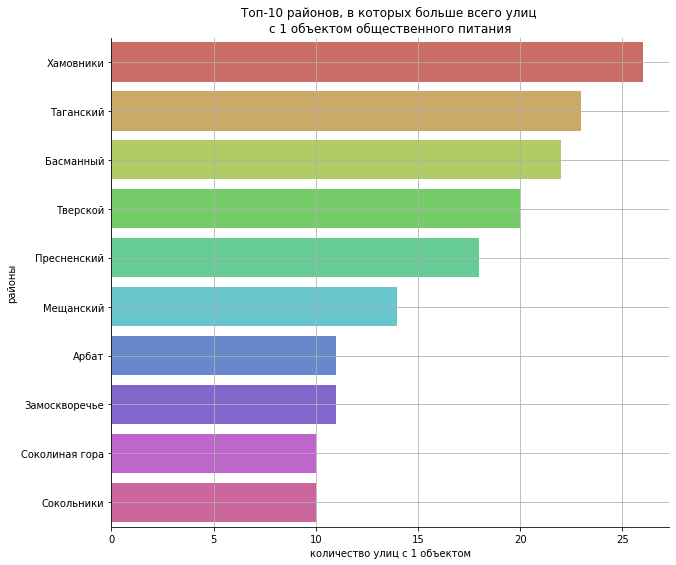

In [22]:
# выводим на график топ-10 районов, в которых больше всего улиц с 1 рестораном

parameters = {
    'figsize': (10, 9),
    'x': 'id',
    'y': 'district',
    'data': with_one_on_street.query('district not in ("can not find street", "can not find house")')\
.groupby('district', as_index = False)['id'].count()\
.sort_values(by = 'id', ascending = False).head(10),
    'xlabel': 'количество улиц с 1 объектом',
    'ylabel': 'районы',
    'title': 'Топ-10 районов, в которых больше всего улиц \nс 1 объектом общественного питания'
}

display(parameters.get('data'))
barplot(parameters)

<div id='id-section23'/>

### [Вывод](#id-section50)

Мы выяснили, что **число улиц с одним объектом общественного питания** равно 538. 

Мы установили, в каких именно районах располагаются данные улицы - они охватывают весь город. 

При этом мы сформировали **топ-10 районов, в которых больше всего концентрация улиц с 1 объектом общественного питания**:
1. Хамовники,
2. Таганский, 
3. Басманный,
4. Тверской, 
5. Пресненский,
6. Мещанский,
7. Арбат,
8. Замоскворечье,
9. Соколиная гора,
10. Сокольники.

Мы объясняем это тем, что данные районы с исторической точки зрения очень старые, там много узких улиц небольшого размера, и на них просто не помещается больше одного заведения.

<div id='id-section24'/>

### [Исследуем распределение числа посадочных мест для улиц с большим количеством объектов общественного питания](#id-section51)

Cформируем срез данных (только улицы, входящие в список топ-10, который мы сформировали ранее) методом `query()` и нарисуем гистограмму для столбца с числом посадочных мест методом `distplot()`.

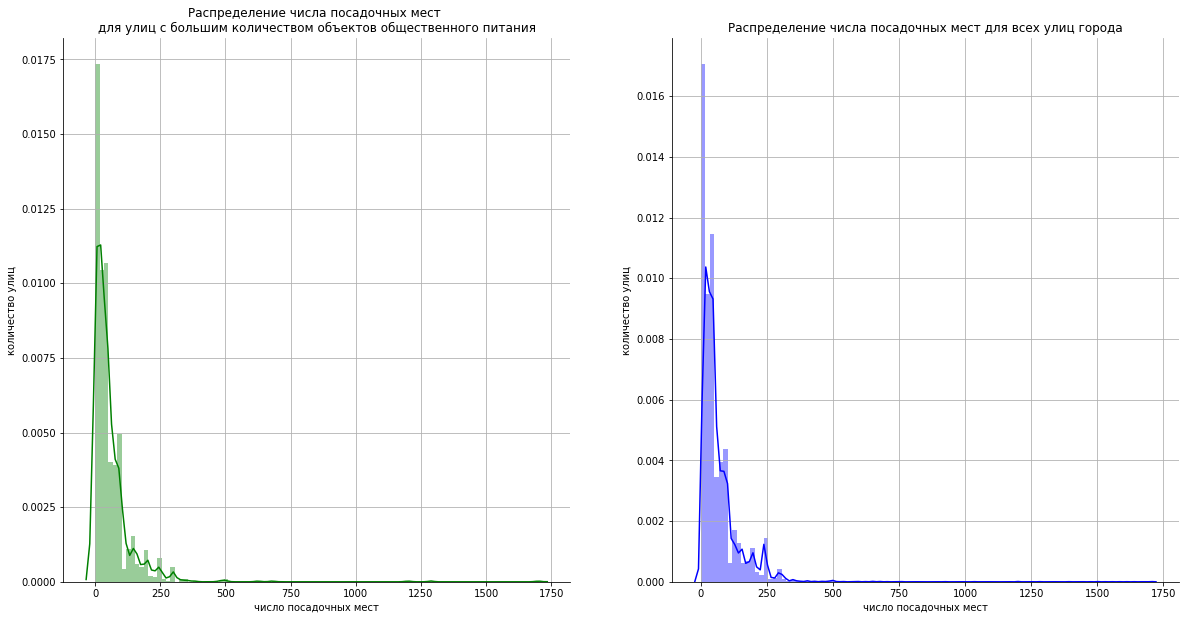

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
sns.distplot(df.query('street in @top_10_street_list')['number'], bins = 100, color = 'green', ax = ax1)
ax1.set_xlabel('число посадочных мест')
ax1.set_ylabel('количество улиц')
ax1.set_title('Распределение числа посадочных мест \nдля улиц с большим количеством объектов общественного питания')
ax1.grid()
sns.despine()

sns.distplot(df['number'], bins = 100, color = 'blue', ax = ax2)
ax2.set_xlabel('число посадочных мест')
ax2.set_ylabel('количество улиц')
ax2.set_title('Распределение числа посадочных мест для всех улиц города')
ax2.grid()
sns.despine()

<div id='id-section25'/>

### [Вывод](#id-section52)

На гистограмме мы видим, что данные имеют **ступенчатое распределение** - это значит, что есть общепринятые пороговые значения для установления числа посадочных мест.

- **Чаще всего** на улицах с большим количеством объектов общественного питания посадочных мест очень мало (либо они отсутствуют).

- Следующей по распространенности является величина в 50 посадочных мест.

- Менее популярно, но все же достаточно распространено, 100 посадочных мест. После этого значения график обваливается вниз.

- Но даже среди непопулярных величин мы четко видим пороговые значения с шагом = 50: 150, 200, 250, 300 посадочных мест.

Мы полагаем, что распространенность небольшого числа посадочных мест (от 0 до 50) связана с высокими арендными ставками и большой конкуренцией за вместительные помещения в зданиях, расположенных по популярным адресам.

**Данная закономерность характерна и для всех остальных объектов общественного питания в городе**, гистограммы практически идентичны. 

<div id='id-section26'/>

## [Шаг 4. Общий вывод](#id-section53)

По результатам исследования мы выяснили, что среди всех видов объектов общественного питания **лидирующие позиции занимают кафе, на втором месте - столовые, на третьем - рестораны**.
- Вероятно, это объясняется тем, что рестораны предоставляют своим посетителям широкий ассортимент «сложных» блюд, то есть прошедших весь технологический цикл приготовления, с очень высоким уровнем обслуживания. 
- Столовые чаще всего открываются государственных учреждениях, поэтому они, в отличие от всех остальных предприятий, всегда обеспечены посетителями и им не нужно предпринимать усилия для привлечения новых клиентов через открытие новых точек. 
- А вот кафе отличаются от ресторанов меньшим ассортиментом блюд и менее жесткими требованиями к способам их приготовления, поэтому открытие кафе кажется нам более простым мероприятием, чем открытие ресторана.

При этом **столовые предоставляют в среднем самое большое количество посадочных мест (130)**.
- Мы снова связываем данный факт с тем, что столовые чаще всего открываются государственных учреждениях, и они изначально должны быть спроектированы таким образом, чтобы предоставить места всем посетителям данных учреждений (учащимся / сотрудникам).

На втором месте по количеству посадочных мест - **рестораны** .
- Вероятно, многие рестораны имеют банкетные залы с большой вместимостью, что позволило им занять достаточно высокую позицию в рейтинге.

**Сетевое распространение в большей степени характерно для предприятий быстрого обслуживания (фаст-фуда)**.
- Мы полагаем, что открытие таких заведений в рамках сети дает преимущества в виде узнаваемости, также при открытии каждого нового заведения можно сэкономить на проработке дизайна и концепции (не надо изобретать ничего нового, концепция реализуется по стандартному шаблону).

Также **сетевые заведения** чаще всего имеют **небольшое количество посадочных мест (до 50)**.

При этом **несетевых заведений значительно больше, чем сетевых**.
- Возможно, с юридической и экономической точек зрения открывать большинство видов заведений проще самостоятельно, чем через франшизы, поэтому получается такой перевес.

Также мы определили **топ-10 улиц по количеству объектов общественного питания и районы их расположения**:
1. проспект Мира (районы Свиблово, Алексеевский),
2. Профсоюзная улица (районы Черемушки, Обручевский, Ясенево),
3. Ленинградский проспект (районы Аэропорт, Беговой),
4. Пресненская набережная (район Пресненский),
5. Варшавское шоссе (районы Нагорный, Донской, Чертаново Южное),
6. Ленинский проспект (районы Обручевский, Тропарево-Никулино),
7. проспект Вернадского (районы Раменки, Тропарево-Никулино),
8. Кутузовский проспект (район Фили-Давыдково),
9. Каширское шоссе (районы Москворечье-Сабурово, Нагатино-Садовники),
10. Кировоградская улица (район Чертаново Центральное).

Мы выяснили, что **число улиц с одним объектом общественного питания** равно 538, а также установили, в каких именно районах располагаются данные улицы - они охватывают весь город. 

При этом мы сформировали **топ-10 районов, в которых больше всего концентрация улиц с 1 объектом общественного питания**:
1. Хамовники,
2. Таганский, 
3. Басманный,
4. Тверской, 
5. Пресненский,
6. Мещанский,
7. Арбат,
8. Замоскворечье,
9. Соколиная Гора,
10. Сокольники.

Мы объясняем это тем, что данные районы с исторической точки зрения очень старые, там много узких улиц небольшого размера, и на них просто не помещается больше одного заведения.

Чаще всего **на улицах с большим количеством объектов общественного питания посадочных мест очень мало (либо они отсутствуют)**. Следующей по распространенности является величина в 50 посадочных мест. Менее популярно, но все же достаточно распространено, 100 посадочных мест. 
- Мы полагаем, что распространенность небольшого числа посадочных мест (от 0 до 50) связана с высокими арендными ставками и большой конкуренцией за вместительные помещения в зданиях, расположенных по популярным адресам.
- **Причем данная закономерность характерна и для всех остальных объектов общественного питания в городе**. 

**Учитывая изложенное, новый объект общественного питания:**
- должен быть открыт в **формате кафе** (это даст возможность работать с не очень большим ассортиментом блюд и менее жесткими требованиями к способам их приготовления),
- иметь **не более 50 посадочных мест** (это позволит арендовать не слишком большое помещение и сэкономить на арендных затратах),
- располагаться **в районе Алексеевский или Раменки** (мы полагаем, что концепция с роботами-официантами хорошо перекликается с близостью к ВДНХ / МГУ - научными выставками и кластерами),
- в случае, если проект запуска кафе окажется успешным, можно рассмотреть **возможность открытия нескольких заведений** (и далее - сети кафе).

<div id='id-section27'/>

## [Шаг 5. Презентация](#id-section54)

Презентация: <https://drive.google.com/file/d/1QgCV2WTZkus9v0NlqIAjkPk80VhXJ2iD/view?usp=sharing> 